In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Moving Windows

In [2]:
tsla=pd.read_csv("TSLA.csv")  

In [3]:
# Indexing the date to plot a good time-series on the graph
tsla['Date'] = pd.to_datetime(tsla['Date'])
tsla.index = tsla['Date']
tsla.head()

df = tsla

In [4]:
ema_window = 9
atr_window = 9

df['EMA'] = df['Close'].ewm(span=ema_window, adjust=False).mean()



In [5]:
df.head()

,Date,Open,Close,High,Low,Volume,EMA
Date,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,223.410004
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,223.414002
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,222.539200
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,221.161359
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,219.129087


In [6]:
df['TR']=''

In [7]:
for i in range(len(df)):
    df['TR'][i] = max((df['High'][i]-df['Low'][i]),(df['High'][i]-df['Close'][i-1]),(df['Close'][i-1]- df['Low'][i]))

/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df.head()

,Date,Open,Close,High,Low,Volume,EMA,TR
Date,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,223.410004,12.38
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,223.414002,6.89
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,222.539200,7.45
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,221.161359,5.37
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,219.129087,9.67


In [9]:
df['ATR'] = df['TR'].ewm(span=atr_window, adjust=False).mean()

df.head()

,Date,Open,Close,High,Low,Volume,EMA,TR,ATR
Date,,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,223.410004,12.38,12.380005
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,223.414002,6.89,11.282004
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,222.539200,7.45,10.515602
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,221.161359,5.37,9.486481
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,219.129087,9.67,9.523184


In [10]:
df['Keltner Upper'] = df['EMA'] + (2*df['ATR'])
df['Keltner Lower'] = df['EMA'] - (2*df['ATR'])

In [11]:
df.head()

,Date,Open,Close,High,Low,Volume,EMA,TR,ATR,Keltner Upper,Keltner Lower
Date,,,,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,223.410004,12.38,12.380005,248.170014,198.649994
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,223.414002,6.89,11.282004,245.978009,200.849994
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,222.539200,7.45,10.515602,243.570405,201.507995
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,221.161359,5.37,9.486481,240.134321,202.188397
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,219.129087,9.67,9.523184,238.175456,200.082718


/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


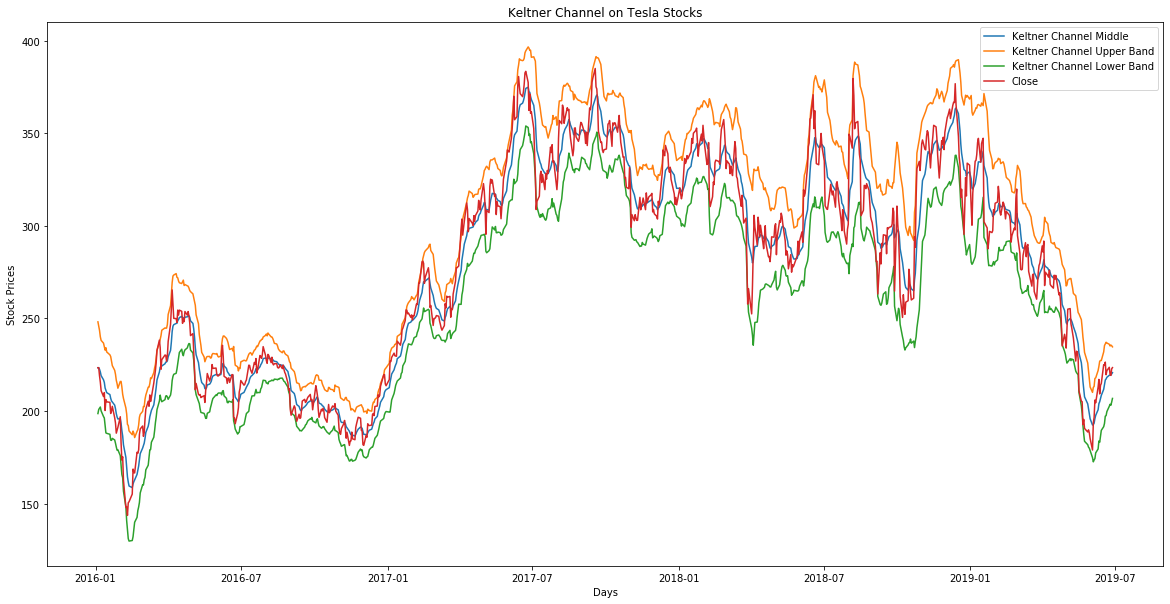

In [12]:
plt.figure(figsize=(20,10))
plt.title('Keltner Channel on Tesla Stocks')
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.plot(df['EMA'], label= 'Keltner Channel Middle')
plt.plot(df['Keltner Upper'], label= 'Keltner Channel Upper Band')
plt.plot(df['Keltner Lower'], label= 'Keltner Channel Lower Band')
plt.plot(df['Close'], label= 'Close')
plt.legend()
plt.show()

In [13]:
invest = df
invest.head()

,Date,Open,Close,High,Low,Volume,EMA,TR,ATR,Keltner Upper,Keltner Lower
Date,,,,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,223.410004,12.38,12.380005,248.170014,198.649994
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,223.414002,6.89,11.282004,245.978009,200.849994
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,222.539200,7.45,10.515602,243.570405,201.507995
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,221.161359,5.37,9.486481,240.134321,202.188397
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,219.129087,9.67,9.523184,238.175456,200.082718


In [14]:
invest['Signal']=''
invest['Holding'] = ''
invest['Cash']=''
invest['Total_Value']=''
invest['Num_shares']=''
invest['Position']=''

In [15]:
#My Code based on H -- FINAL
#buy 1, signal 0
state = 0
for i in range(len(invest)):
    if invest['Close'][i] < invest['Keltner Lower'][i]:
        if state == 0:
            state = 1
            invest['Position'][i]='Buy'
            invest['Signal'][i] = state
            
        else: 
            invest['Signal'][i] = state
        
            
    elif invest['Close'][i]> invest['Keltner Upper'][i]:
        if state == 1:
            invest['Position'][i]='Sell'
            state = 0
            invest['Signal'][i] = state
            
        else:
            invest['Signal'][i] = state
    else:
        invest['Signal'][i] = state

invest.head(50)

/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/rishikadawkar/anac

,Date,Open,Close,High,Low,Volume,EMA,TR,ATR,Keltner Upper,Keltner Lower,Signal,Holding,Cash,Total_Value,Num_shares,Position
Date,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,223.410004,12.38,12.380005,248.170014,198.649994,0,,,,,
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,223.414002,6.89,11.282004,245.978009,200.849994,0,,,,,
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,222.539200,7.45,10.515602,243.570405,201.507995,0,,,,,
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,221.161359,5.37,9.486481,240.134321,202.188397,0,,,,,
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,219.129087,9.67,9.523184,238.175456,200.082718,0,,,,,
2016-01-11,2016-01-11,214.009995,207.850006,214.449997,203.000000,4089700,216.873271,11.45,9.908547,236.690365,197.056177,0,,,,,
2016-01-12,2016-01-12,211.600006,209.970001,213.740005,205.309998,3091900,215.492617,8.43001,9.612839,234.718295,196.266939,0,,,,,
2016-01-13,2016-01-13,212.009995,200.309998,212.649994,200.000000,4126400,212.456093,12.65,10.220270,232.896633,192.015553,0,,,,,
2016-01-14,2016-01-14,202.210007,206.179993,210.000000,193.380005,6490700,211.200873,16.62,11.500215,234.201303,188.200443,0,,,,,


In [16]:
invest.head(70)

,Date,Open,Close,High,Low,Volume,EMA,TR,ATR,Keltner Upper,Keltner Lower,Signal,Holding,Cash,Total_Value,Num_shares,Position
Date,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,223.410004,12.38,12.380005,248.170014,198.649994,0,,,,,
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,223.414002,6.89,11.282004,245.978009,200.849994,0,,,,,
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,222.539200,7.45,10.515602,243.570405,201.507995,0,,,,,
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,221.161359,5.37,9.486481,240.134321,202.188397,0,,,,,
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,219.129087,9.67,9.523184,238.175456,200.082718,0,,,,,
2016-01-11,2016-01-11,214.009995,207.850006,214.449997,203.000000,4089700,216.873271,11.45,9.908547,236.690365,197.056177,0,,,,,
2016-01-12,2016-01-12,211.600006,209.970001,213.740005,205.309998,3091900,215.492617,8.43001,9.612839,234.718295,196.266939,0,,,,,
2016-01-13,2016-01-13,212.009995,200.309998,212.649994,200.000000,4126400,212.456093,12.65,10.220270,232.896633,192.015553,0,,,,,
2016-01-14,2016-01-14,202.210007,206.179993,210.000000,193.380005,6490700,211.200873,16.62,11.500215,234.201303,188.200443,0,,,,,


#My basic strategy to check the money made

import math 

Cash = float(10000)

for i in range(len(invest)):
        if invest['Position'][i]== 'Buy':
            N = math.floor(Cash/invest['Close'][i])        #number of shares that can be bought at 10,000
            Holding = invest['Close'][i] * N
            Cash = Cash - Holding
        if invest['Position'][i]== 'Sell':
            Holding = invest['Close'][i] * N
            Cash = Cash + Holding
        

Cash #since we haven't closed the position yet, this only shows leftover cash

In [17]:
#Final strategy

import math 

cash = float(10000) #N = math.floor(cash/invest['Close'][i]) -->will re-invest only 10,000$ each time and save profits
Cash = float(10000)
N = 0

for i in range(len(invest)):
    if invest['Position'][i]== 'Buy':
        N = math.floor(cash/invest['Close'][i])        #number of shares that can be bought at 10,000
        invest['Holding'][i] = invest['Close'][i] * N
        Cash = Cash - invest['Holding'][i]
        invest['Cash'][i] = Cash
        invest['Total_Value'][i] = Cash + invest['Holding'][i] #leftover cash plus invested amount
        invest['Num_shares'][i] = N
        
    elif invest['Position'][i]== 'Sell':
        Holding = invest['Close'][i] * N
        Cash = Cash + Holding
        invest['Cash'][i] = Cash
        invest['Holding'][i] = 0
        invest['Total_Value'][i] = Cash
        N = 0
        invest['Num_shares'][i] = N
        
    else:
        if invest['Signal'][i] == 1:
            invest['Holding'][i] = invest['Close'][i] * N
            invest['Cash'][i]   = Cash #leftover cash from the last buy 
            invest['Total_Value'][i] = Cash + invest['Holding'][i]
            invest['Num_shares'][i] = N
            
        else:
            invest['Holding'][i] = invest['Close'][i] * N
            invest['Cash'][i]    = Cash
            invest['Total_Value'][i] = Cash
            invest['Num_shares'][i] = N
            

/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packa

In [18]:
invest.tail(300)

,Date,Open,Close,High,Low,Volume,EMA,TR,ATR,Keltner Upper,Keltner Lower,Signal,Holding,Cash,Total_Value,Num_shares,Position
Date,,,,,,,,,,,,,,,,,
2018-04-20,2018-04-20,295.170013,290.239990,299.980011,289.750000,5627900,293.665852,10.33,12.492506,318.650864,268.680840,1,11029.1,8206.11,19235.2,38,
2018-04-23,2018-04-23,291.290009,283.369995,291.619995,282.329987,4893400,291.606681,9.29001,11.852006,315.310693,267.902668,1,10768.1,8206.11,18974.2,38,
2018-04-24,2018-04-24,285.000000,283.459991,287.089996,278.459991,5685300,289.977343,8.63,11.207606,312.392555,267.562130,1,10771.5,8206.11,18977.6,38,
2018-04-25,2018-04-25,283.500000,280.690002,285.160004,277.250000,4013600,288.119875,7.91,10.548086,309.216046,267.023703,1,10666.2,8206.11,18872.3,38,
2018-04-26,2018-04-26,278.750000,285.480011,285.790009,276.500000,4356000,287.591902,9.29001,10.296470,308.184842,266.998961,1,10848.2,8206.11,19054.4,38,
2018-04-27,2018-04-27,285.369995,294.079987,294.470001,283.829987,4364600,288.889519,10.64,10.365179,309.619877,268.159161,1,11175,8206.11,19381.1,38,
2018-04-30,2018-04-30,293.609985,293.899994,298.730011,292.500000,4228200,289.891614,6.23001,9.538145,308.967905,270.815323,1,11168.2,8206.11,19374.3,38,
2018-05-01,2018-05-01,293.510010,299.920013,300.820007,293.220001,4625600,291.897294,7.60001,9.150518,310.198329,273.596259,1,11397,8206.11,19603.1,38,
2018-05-02,2018-05-02,298.570007,301.149994,306.850006,297.779999,8970400,293.747834,9.07001,9.134415,312.016665,275.479003,1,11443.7,8206.11,19649.8,38,


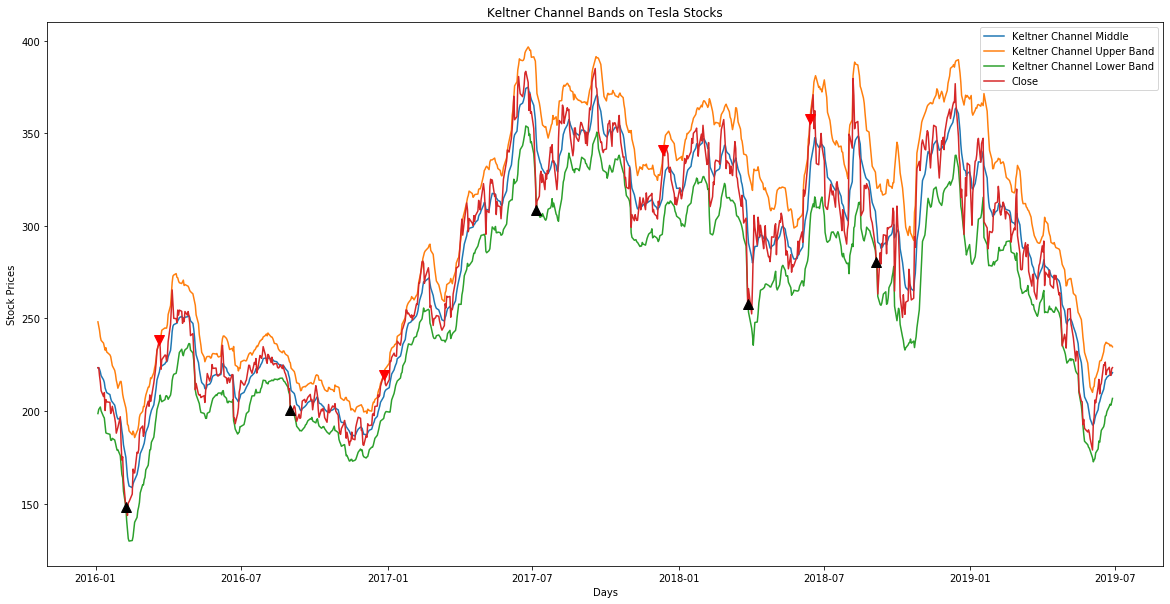

In [19]:
df = invest

plt.figure(figsize=(20,10))
plt.title('Keltner Channel Bands on Tesla Stocks')
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.plot(df['EMA'], label= 'Keltner Channel Middle')
plt.plot(df['Keltner Upper'], label= 'Keltner Channel Upper Band')
plt.plot(df['Keltner Lower'], label= 'Keltner Channel Lower Band')
plt.plot(df['Close'], label= 'Close')
    
# Plot the buy signals
plt.plot(df.loc[df.Position == 'Buy'].index, 
         df.Close[df.Position == 'Buy'],
         '^', markersize=10, color='k')


# Plot the sell signals
plt.plot(df.loc[df.Position == 'Sell'].index, 
         df.Close[df.Position == 'Sell'],
         'v', markersize=10, color='r')


# Plot the sell signals
#ax1.plot(signals.loc[signals.positions == -1.0].index, 
#         signals.short_mavg[signals.positions == -1.0],
 #        'v', markersize=10, color='r')    
plt.legend()
plt.show()

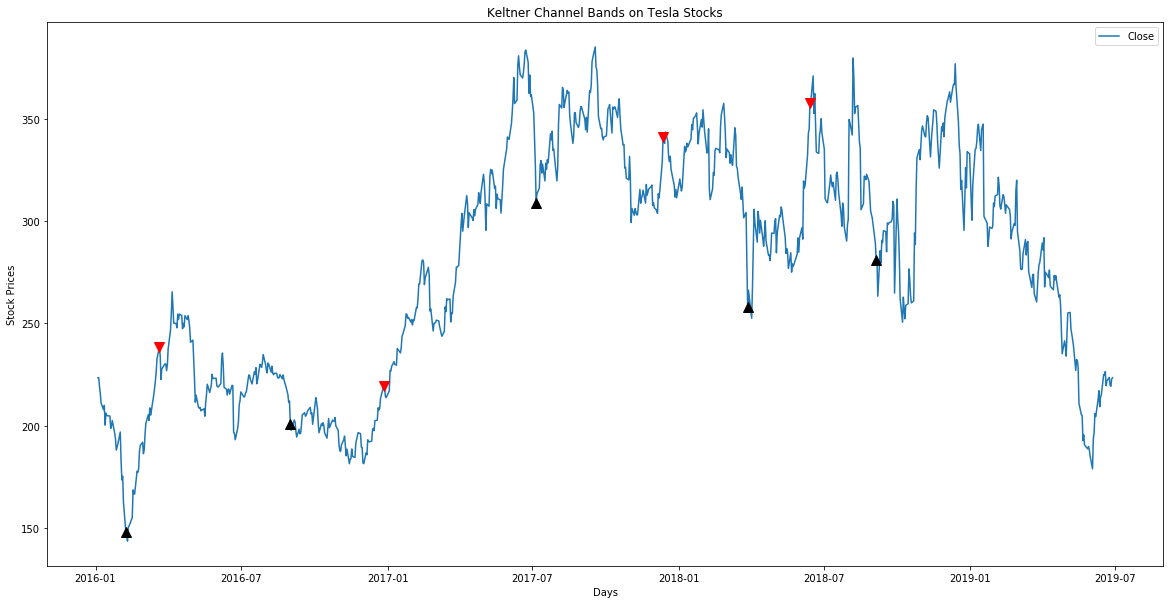

In [20]:
plt.figure(figsize=(20,10))
plt.title('Keltner Channel Bands on Tesla Stocks')
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.plot(df['Close'], label= 'Close')
    
# Plot the buy signals
plt.plot(df.loc[df.Position == 'Buy'].index, 
         df.Close[df.Position == 'Buy'],
         '^', markersize=10, color='k')


# Plot the sell signals
plt.plot(df.loc[df.Position == 'Sell'].index, 
         df.Close[df.Position == 'Sell'],
         'v', markersize=10, color='r')


# Plot the sell signals
#ax1.plot(signals.loc[signals.positions == -1.0].index, 
#         signals.short_mavg[signals.positions == -1.0],
 #        'v', markersize=10, color='r')    
plt.legend()
plt.show()

In [21]:
invest['returns'] = invest['Total_Value'].pct_change()

invest.head(50)

,Date,Open,Close,High,Low,Volume,EMA,TR,ATR,Keltner Upper,Keltner Lower,Signal,Holding,Cash,Total_Value,Num_shares,Position,returns
Date,,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,223.410004,12.38,12.380005,248.170014,198.649994,0,0,10000,10000,0,,NaN
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,223.414002,6.89,11.282004,245.978009,200.849994,0,0,10000,10000,0,,0.000000
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,222.539200,7.45,10.515602,243.570405,201.507995,0,0,10000,10000,0,,0.000000
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,221.161359,5.37,9.486481,240.134321,202.188397,0,0,10000,10000,0,,0.000000
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,219.129087,9.67,9.523184,238.175456,200.082718,0,0,10000,10000,0,,0.000000
2016-01-11,2016-01-11,214.009995,207.850006,214.449997,203.000000,4089700,216.873271,11.45,9.908547,236.690365,197.056177,0,0,10000,10000,0,,0.000000
2016-01-12,2016-01-12,211.600006,209.970001,213.740005,205.309998,3091900,215.492617,8.43001,9.612839,234.718295,196.266939,0,0,10000,10000,0,,0.000000
2016-01-13,2016-01-13,212.009995,200.309998,212.649994,200.000000,4126400,212.456093,12.65,10.220270,232.896633,192.015553,0,0,10000,10000,0,,0.000000
2016-01-14,2016-01-14,202.210007,206.179993,210.000000,193.380005,6490700,211.200873,16.62,11.500215,234.201303,188.200443,0,0,10000,10000,0,,0.000000


In [22]:
# Isolate the returns of your strategy
returns = invest['returns']

# annualized 
#annualize the Sharpe ratio, since we calculated it from daily values. 
#There are 252 trading days in the year, so the simple way to annualize it is to multiply the Sharpe ratio by the square root of 252.
#Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

1.107608689338493


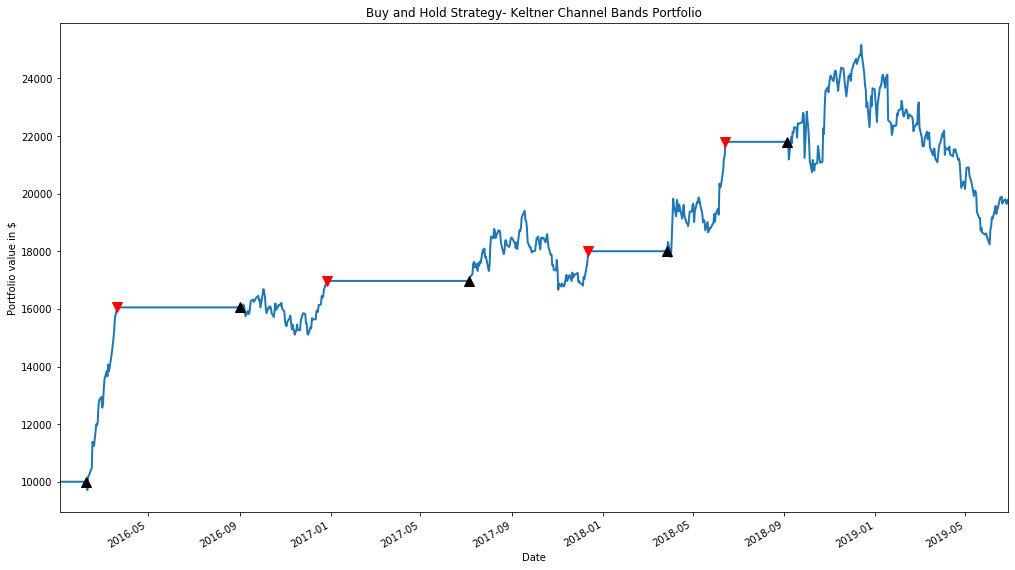

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

plt.title('Buy and Hold Strategy- Keltner Channel Bands Portfolio')
# Plot the equity curve in dollars
df['Total_Value'].plot(ax=ax1, lw=2.,figsize=(17,10))


# Plot the buy signals
plt.plot(df.loc[df.Position == 'Buy'].index, 
         df.Total_Value[df.Position == 'Buy'],
         '^', markersize=10, color='k')


# Plot the sell signals
plt.plot(df.loc[df.Position == 'Sell'].index, 
         df.Total_Value[df.Position == 'Sell'],
         'v', markersize=10, color='r')

# Show the plot
plt.show()